In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

      Sex  Pclass  Survived  Count
0     men       1         0     77
1     men       1         1     45
2     men       2         0     91
3     men       2         1     17
4     men       3         0    300
5     men       3         1     47
6   women       1         0      3
7   women       1         1     91
8   women       2         0      6
9   women       2         1     70
10  women       3         0     72
11  women       3         1     72


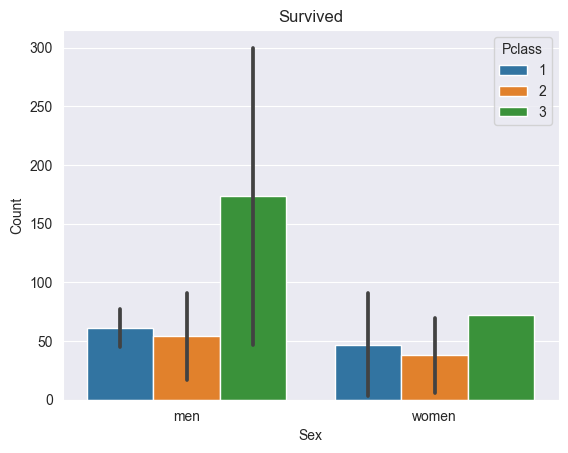

In [ ]:
# A partir del fichero del Titanic, realizar los siguiente:
# a) Confeccione un gráfico de barras para visualizar hombres y mujeres que han sobrevivido

var_dataframe = pd.read_csv ('titanic.csv')

var_dataframe ['Sex'].replace ({'female': 'women'}, inplace = True)
var_dataframe ['Sex'].replace ({'male': 'men'}, inplace = True)

var_survived_by_gender = var_dataframe.groupby (['Sex', 'Pclass', 'Survived']).size ().reset_index (name = 'Count')

print (var_survived_by_gender)

sns.barplot (x = 'Sex', y = 'Count', hue = 'Pclass', data = var_survived_by_gender)

plt.title ('Survived')
plt.xlabel ('Sex')
plt.ylabel ('Count')

plt.show ()

In [ ]:
# b) Cambiar el color del gráfico

var_survived_by_class = var_dataframe.groupby (['Sex', 'Pclass', 'Survived']).size ().unstack ()

print (var_survived_by_class)

var_survived_by_class.barplot (hue = 'Pclass', color = ['cyan', 'magenta'])

plt.title ('Survived')
plt.xlabel ('Gender and class')
plt.ylabel ('Count')

plt.show ()

Survived        0   1
Sex   Pclass         
men   1        77  45
      2        91  17
      3       300  47
women 1         3  91
      2         6  70
      3        72  72


AttributeError: 'DataFrame' object has no attribute 'barplot'

In [ ]:
# c) Gráfico barras agrupados